In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

def standardise(vec): return (vec - vec.mean()) / vec.std()
pd.set_option("display.max_rows", 500)

In [ ]:
# !curl "https://lsde-2021.cloud.databricks.com/files/group09/attack-day.parquet/*?o=3829739689441890" --output "../../data/small/attack-day-granular.parquet"

# !wget -r "https://lsde-2021.cloud.databricks.com/files/group09/attack-day.parquet/*?o=3829739689441890" -P "../../data/small/attack-day-titles"

In [ ]:
# !dbfs cp -r "dbfs:/FileStore/group09/attack-day-weekbefore.parquet" "../../data/big/attack-day2.parquet"

In [4]:
df = pd.read_parquet("../../data/big/attack-day.parquet")
df2 = pd.read_parquet("../../data/big/attack-day2.parquet")

In [5]:
df["date"] = pd.to_datetime(df["timestamp"], unit="s")
df2["date"] = pd.to_datetime(df2["timestamp"], unit="s")

In [13]:
df3 = pd.concat([df, df2])

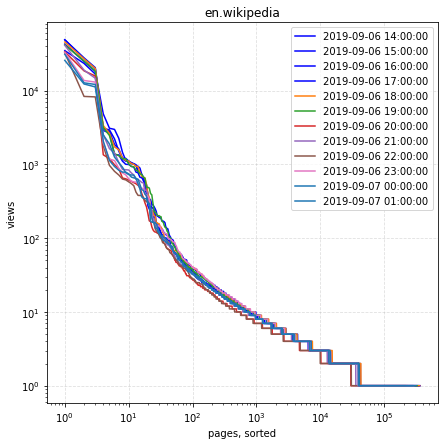

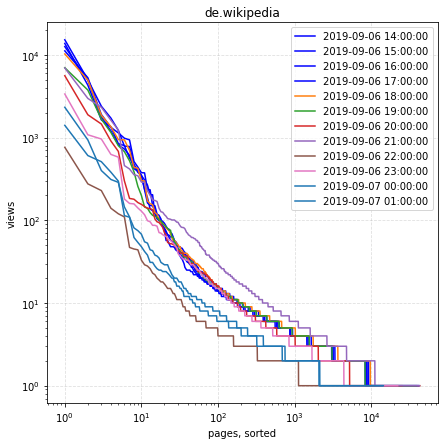

In [33]:
timestamps = df["timestamp"].unique()
domains = ["en.wikipedia", "de.wikipedia"]
attack = datetime.datetime(2019, 9, 6, 17, 40, 0)

for domain in domains:
    plt.figure(figsize=(7,7))
    for ts in timestamps:
        tmpdf = df[df["domain"] == domain]
        dist = tmpdf[tmpdf["timestamp"] == ts]["count"].sort_values(ascending=False)

        x = np.arange(len(dist))+1
        y = dist.to_numpy()

        color = "blue" if datetime.datetime.fromtimestamp(ts) < attack else f"C{max(0,datetime.datetime.fromtimestamp(ts).hour-17)}"
        label = datetime.datetime.fromtimestamp(ts)
        
        plt.plot(x, y, color=color, label=label)

    plt.grid(alpha=0.4, linestyle="--")

    plt.title(domain)
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel("views")
    plt.xlabel("pages, sorted")
    plt.legend()
    plt.show()

15


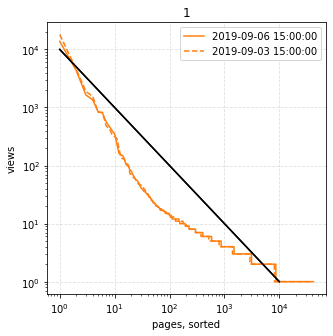

16


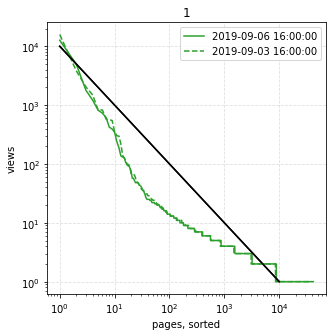

17


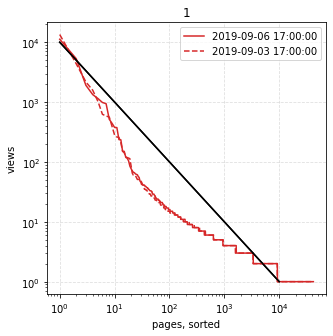

18


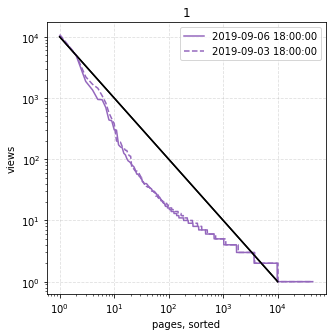

19


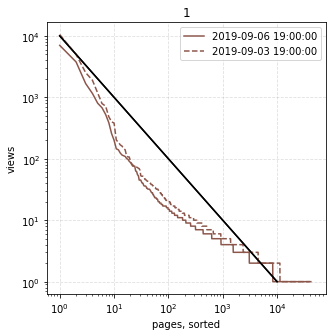

20


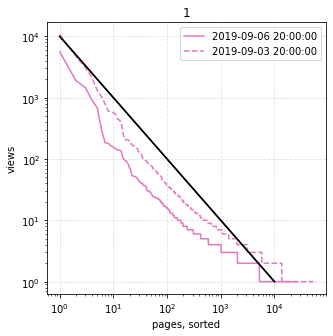

21


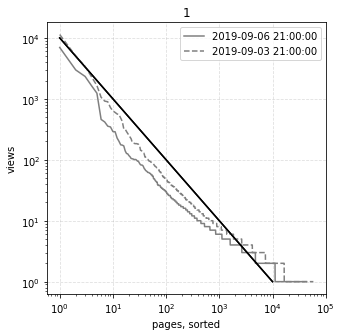

22


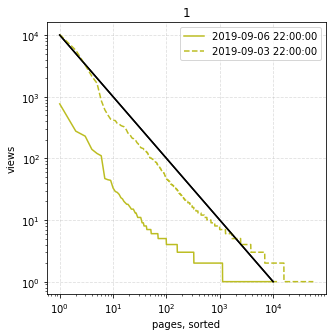

23


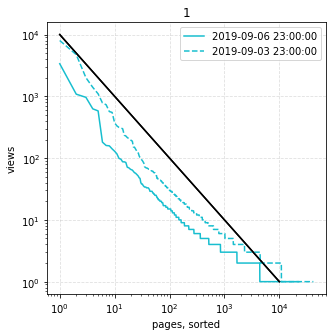

In [136]:
timestamps = df3["timestamp"].unique()
tmpdf = df3[df3["domain"] == "de.wikipedia"]

ref = (np.linspace(0, 10**4, 10**4)**-1)*10**4  # lol

for particularhour in range(15, 24):
    print(particularhour)
    plt.figure(figsize=(5,5))
    for ts in timestamps:

        hour = datetime.datetime.fromtimestamp(ts).hour
        if hour != particularhour:
            continue
        else:
            color = f"C{hour-14}"
        
        dist = tmpdf[tmpdf["timestamp"] == ts]["count"].sort_values(ascending=False)

        x = np.arange(len(dist))+1
        y = dist.to_numpy()

        # color = "blue" if datetime.datetime.fromtimestamp(ts) < attack else "red"
        
        # print(hour)
        # if (hour < 16) or (hour > 18):
        
            
            
        label = datetime.datetime.fromtimestamp(ts)
        ls = "--" if datetime.datetime.fromtimestamp(ts).day < 5 else "-"
        
        plt.plot(x, y, color=color, label=label, linestyle=ls)
        plt.plot(ref, color="black")

        plt.grid(alpha=0.4, linestyle="--")

    plt.title(hour)
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel("views")
    plt.xlabel("pages, sorted")
    plt.legend()
    plt.show()

In [126]:
# df[df["date"].dt.hour == attack.hour].head(100)

## Goal: search for topics that are usually ranked lower

How could we do it?
- compute stdev of all rankings or views --> no, because this is same std np.std([1,1000]), np.std([1000,2000]), however a topic
- std of views

We can reduce the space of titles to look for greatly by just focusing on titles that got x amount of views (x has to be small though) during the day/time of the attack

In [90]:
print(np.std([np.log(1), np.log(1000)]))
print(np.std([np.log(1000), np.log(1000*1000)]))

3.4538776394910684
3.4538776394910684


In [107]:
fil = (df.title == "Apple") & (df.domain == "en.wikipedia")# & (df.accessType == "desktop") & (df.trafficType == "user")

In [129]:
# df3[df3.title == "Apple"]

In [131]:
np.std(np.log()), np.std(np.log([1, 1, 2, 10000]))

(0.29288125904887624, 3.898430977834643)

In [133]:
dist1 = np.array([10000, 15000, 20000, 10000])
dist2 = np.array([1, 1, 2, 10000])

standardise(dist1), standardise(dist2)

(array([-0.90453403,  0.30151134,  1.50755672, -0.90453403]),
 array([-0.57742726, -0.57742726, -0.57719629,  1.7320508 ]))